<a href="https://colab.research.google.com/github/smitjiwani/DWM-pynbs/blob/main/DWM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

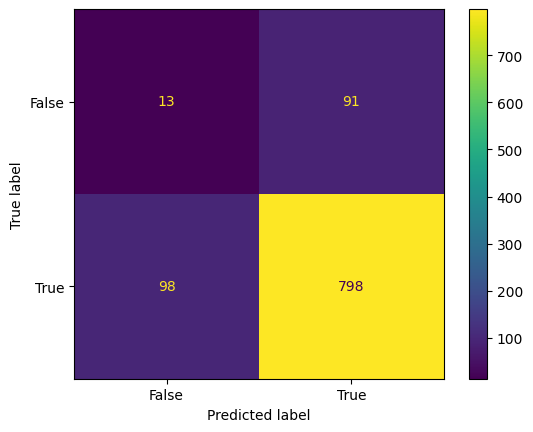

In [12]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import pandas as pd


actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [4]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.814


In [5]:
Precision = metrics.precision_score(actual, predicted)

print(Precision)

0.8984375


In [6]:
Sensitivity_recall = metrics.recall_score(actual, predicted)

print(Sensitivity_recall)

0.8944444444444445


In [7]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)

print(Specificity)

0.09


In [8]:
F1_score = metrics.f1_score(actual, predicted)

print(F1_score)

0.8964365256124722


In [10]:
#metrics:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.814, 'Precision': 0.8984375, 'Sensitivity_recall': 0.8944444444444445, 'Specificity': 0.09, 'F1_score': 0.8964365256124722}


In [13]:
path = "/content/01-data(confusion matrix).csv"
df = pd.read_csv(path)

In [14]:
df.head()

,UserID,Gender,Type,Age,Salary,Purchased
0,1,Male,B,24,2800000,0
1,2,Male,A,48,3000000,0
2,3,Female,B,34,7800000,0
3,4,Female,B,36,10700000,0
4,5,Male,D,24,14700000,0


In [15]:
# defining x and y
x = df.iloc[:,3:5].values
y = df.iloc[:,-1].values

In [17]:
# preprocessing
# train tact enlit

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=0)

# scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit (x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [22]:
# Prediction
y_pred = model.predict(x_test)

#evalutaion
accuracy = metrics.accuracy_score (y_test,y_pred)
print(accuracy)

0.93


Confusion Matrix:
[[64  4]
 [ 3 29]]


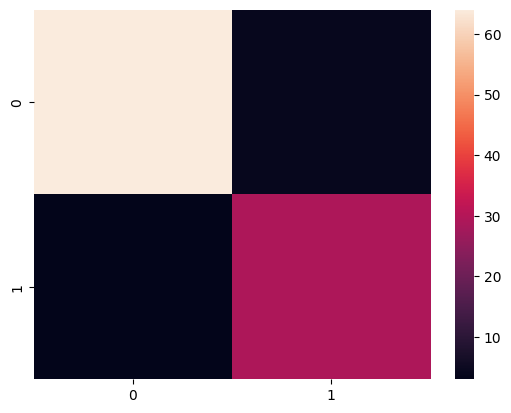

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
print("Confusion Matrix:")

print(cm)

# heatmap

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm)

plt.show()

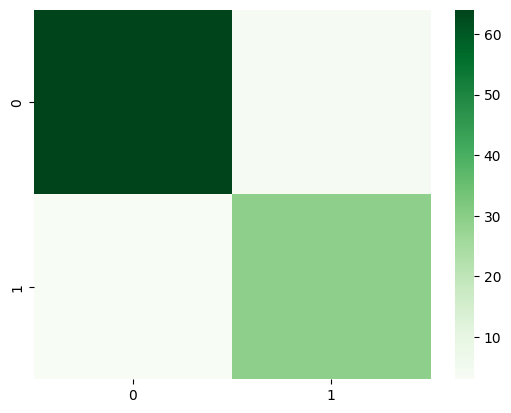

In [29]:
sns.heatmap(cm,cmap="Greens")
plt.show()

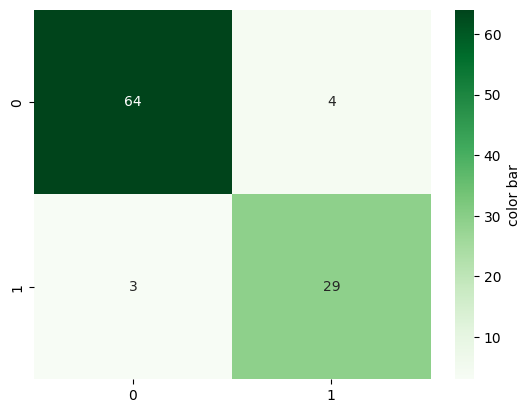

In [30]:
sns.heatmap(cm, cmap="Greens", annot=True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.show()

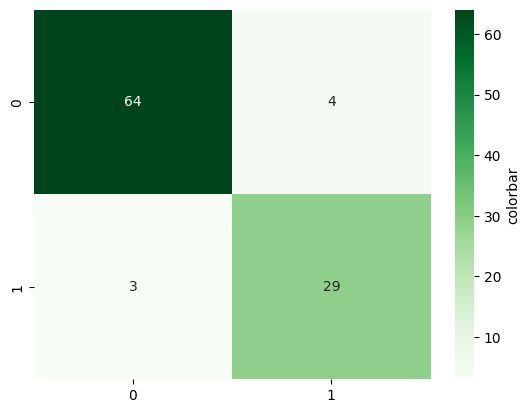

In [31]:
sns.heatmap(cm, cmap="Greens", annot=True, cbar_kws={"orientation":"vertical","label":"colorbar"})
plt.show()

Normalized Confusion Matrix:
[[0.94 0.06]
 [0.09 0.91]]


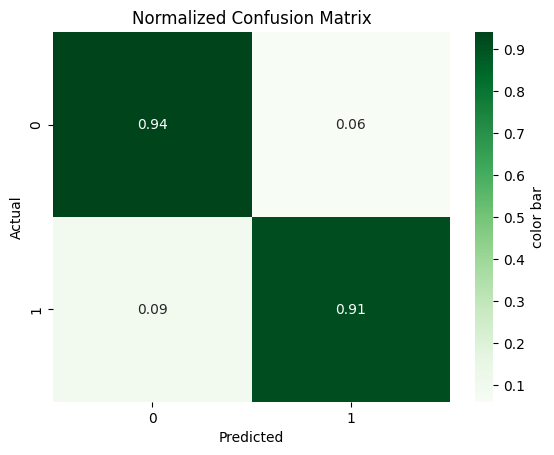

In [32]:
# normalized
import numpy as np
print("Normalized Confusion Matrix:")
cm_normalized=np.round(cm/np.sum(cm, axis=1).reshape(-1,1),2)
print(cm_normalized)
#heatmap
sns.heatmap(cm_normalized, cmap="Greens", annot=True,
cbar_kws={"orientation": "vertical", "label": "color bar"}, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()